In [3]:
import pandas as pd

In [4]:
counts = pd.read_csv("../DK_total_count_matrix.csv", index_col=0)

In [5]:
counts = counts[['mRNA_wt_rep1', 'mRNA_wt_rep2']]
counts

,mRNA_wt_rep1,mRNA_wt_rep2
YAL067C,81,79
YAL063C-A,260,157
YAL063C,20223,13117
YAL054C,402,316
YAL049C,1182,786
...,...,...
YPR191W,1704,1338
YPR192W,12,5
YPR196W,381,248
YPR198W,801,487


In [6]:
raw_values = counts.mRNA_wt_rep1.tolist() + counts.mRNA_wt_rep2.tolist()
raw_values = [x for x in raw_values if x > 0]
raw_values

[81,
 260,
 20223,
 402,
 1182,
 298,
 268,
 2660,
 1119,
 1626,
 435,
 2,
 1136,
 392,
 172,
 475,
 1788,
 115,
 1690,
 520,
 623,
 6456,
 386,
 1286,
 144,
 11,
 215,
 448,
 322,
 1375,
 134878,
 1069,
 1943,
 1463,
 1138,
 300,
 648,
 250,
 176,
 9,
 277,
 86,
 365,
 3837,
 249,
 530,
 1070,
 101,
 2838,
 1196,
 3,
 264,
 1196,
 1353,
 86600,
 73,
 4613,
 167,
 244,
 382,
 153,
 81,
 918,
 1535,
 2381,
 367,
 2465,
 258,
 265,
 541,
 164,
 11592,
 1367,
 1087,
 802,
 194,
 1262,
 120,
 984,
 300,
 127,
 156,
 189,
 144,
 1880,
 35657,
 18,
 472,
 5116,
 226,
 280,
 1384,
 796,
 453,
 1486,
 485,
 241,
 1035,
 1874,
 4426,
 307,
 755,
 340,
 402,
 9715,
 2892,
 368,
 17054,
 7,
 28,
 1092,
 851,
 2121,
 1097,
 407,
 450,
 685,
 664,
 1690,
 6429,
 2351,
 1582,
 1295,
 2121,
 866,
 617,
 1067,
 758,
 6971,
 230,
 415,
 1116,
 4274,
 164,
 202,
 4086,
 662,
 216,
 4332,
 611,
 1642,
 882,
 1705,
 467,
 771,
 597,
 381,
 1701,
 7288,
 213,
 340,
 712,
 2111,
 2276,
 73,
 76,
 2923,
 670

In [7]:
import fitter
import matplotlib.pyplot as plt
import numpy as np

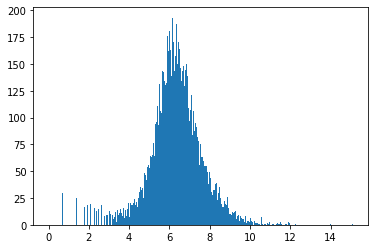

In [10]:
plt.hist(np.log(raw_values), bins=400)
plt.show()
plt.close()

In [24]:
f = fitter.Fitter(np.log(raw_values))
f.fit()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


,sumsquare_error,aic,bic,kl_div
dgamma,0.014272,925.808662,-152486.230732,inf
hypsecant,0.016503,961.737340,-150864.267926,inf
dweibull,0.017622,925.114269,-150117.731939,inf
gennorm,0.023589,916.139135,-146841.689710,inf
laplace,0.027018,904.670391,-145326.143056,inf


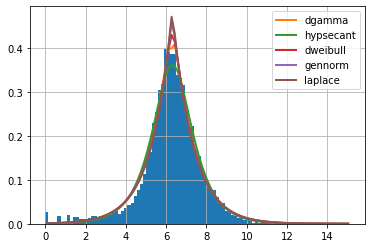

In [25]:
f.summary()

In [27]:
f.fitted_param['gennorm']

(1.031966908880634, 6.300794747865959, 1.0705689069170423)

In [73]:
f.fitted_param.keys()

dict_keys(['anglit', 'cauchy', 'expon', 'dweibull', 'dgamma', 'cosine', 'gennorm', 'gumbel_l', 'genlogistic', 'gumbel_r', 'hypsecant', 'laplace', 'logistic', 'norm', 'uniform', 'wrapcauchy'])

In [34]:
gennorm_params = (1.031966908880634, 6.300794747865959, 1.0705689069170423)
lognorm_params = scipy.stats.lognorm.fit(raw_values)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


In [36]:
lognorm_params

(1.234670021379368, -24.06600490562422, 587.9306841700432)

In [59]:
import scipy 
x = np.linspace(0.0, 14.0, num=500000)
distr = scipy.stats.lognorm(1.234670021379368, loc=-24.06600490562422, scale=587.9306841700432)

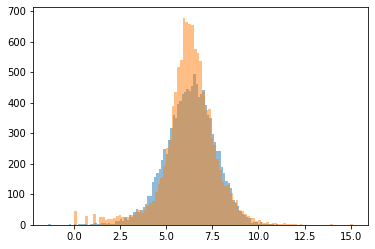

In [63]:
plt.hist(np.log(distr.rvs(12000)), bins=100, alpha=0.5)
plt.hist(np.log(raw_values), bins=100, alpha=0.5)
plt.show()
plt.close()

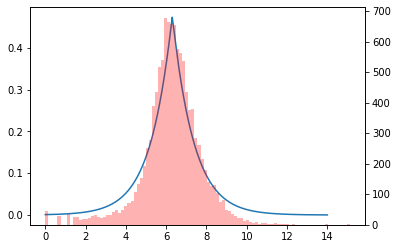

In [69]:
fig, ax1 = plt.subplots()

#x = np.linspace(0.0, 1e6, num=500000)

#distr = scipy.stats.lognorm.pdf(x, 1.234670021379368, loc=-24.06600490562422, scale=587.9306841700432)

#ax1.plot(np.log(x), distr)

x = np.linspace(0.0, 14, 50000)

distr = scipy.stats.gennorm.pdf(x, 1.031966908880634, loc=6.300794747865959, scale=1.0705689069170423)

ax1.plot(x, distr)
#plt.hist(np.log(raw_values), bins=100)

ax2 = ax1.twinx()

ax2.hist(np.log(raw_values), bins=100, alpha = 0.3, color = 'red')

plt.show()
plt.close()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


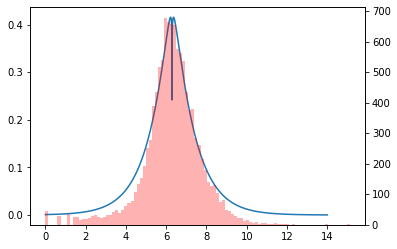

In [71]:
fig, ax1 = plt.subplots()

x = np.linspace(0.0, 14, 50000)

distr = scipy.stats.dgamma.pdf(x, 1.0768376597134417, loc=6.290909381611404, scale=0.9518020591185223)

ax1.plot(x, distr)
#plt.hist(np.log(raw_values), bins=100)

ax2 = ax1.twinx()

ax2.hist(np.log(raw_values), bins=100, alpha = 0.3, color = 'red')

plt.show()
plt.close()



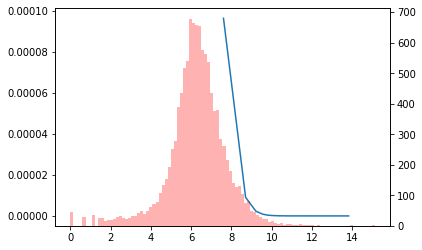

In [81]:
fig, ax1 = plt.subplots()

x = np.linspace(-1e6, 1e6, 500)

distr = scipy.stats.lognorm.pdf(x, 1.234670021379368, loc=-24.06600490562422, scale=587.9306841700432)

ax1.plot(np.log(x), distr)
#plt.hist(np.log(raw_values), bins=100)

ax2 = ax1.twinx()

ax2.hist(np.log(raw_values), bins=100, alpha = 0.3, color = 'red')

plt.show()
plt.close()

